In [364]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [365]:
heart_df = pd.read_csv(r'raw_merged_heart_dataset.csv')

In [366]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [367]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


In [368]:
##Creating a new column to simulate countries over the world with high rate of heart disease
high_heart_disease_countries = ["United States", "Russia", "India", "China", "Brazil", "Ukraine", "Germany", "United Kingdom", "Mexico", "South Africa"]

# As 2nd column
heart_df.insert(1, 'Country', np.random.choice(high_heart_disease_countries, size=len(heart_df)))


In [369]:
# Each sublist contains 3 states/regions with high heart disease burden for the corresponding country
high_heart_disease_states = [
    ["Alabama", "Mississippi", "West Virginia"],         # United States
    ["Moscow Oblast", "Saint Petersburg", "Krasnodar"],  # Russia
    ["Kerala", "Tamil Nadu", "Goa"],                     # India
    ["Beijing", "Shanghai", "Guangdong"],               # China
    ["São Paulo", "Rio de Janeiro", "Bahia"],           # Brazil
    ["Kyiv", "Kharkiv", "Dnipro"],                      # Ukraine
    ["Bavaria", "North Rhine-Westphalia", "Saxony"],    # Germany
    ["England", "Scotland", "Wales"],                   # United Kingdom
    ["Mexico City", "Jalisco", "Nuevo León"],           # Mexico
    ["Gauteng", "KwaZulu-Natal", "Eastern Cape"]        # South Africa
]


In [370]:
#Function to assign Random states based on the countries defined earlier
def pick_state(Country):
    if Country in high_heart_disease_countries:
        country_index = high_heart_disease_countries.index(Country)
        return np.random.choice(high_heart_disease_states[country_index])
    else:
        np.nan

In [371]:
heart_df.insert(2,'State', heart_df['Country'].apply(pick_state))

In [372]:
heart_df.head()

,age,Country,State,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,Russia,Krasnodar,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,United States,West Virginia,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,China,Shanghai,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Germany,Bavaria,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,India,Kerala,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [373]:
#No nullvalues here 
heart_df.isnull().sum().sum()

np.int64(0)

In [374]:
heart_df.corr(numeric_only=True)

,age,sex,cp,oldpeak,target
age,1.000000,-0.094249,-0.083587,0.228801,-0.094863
sex,-0.094249,1.000000,0.004036,0.090276,-0.139418
cp,-0.083587,0.004036,1.000000,-0.098740,0.343394
oldpeak,0.228801,0.090276,-0.098740,1.000000,-0.206794
target,-0.094863,-0.139418,0.343394,-0.206794,1.000000


In [375]:
heart_df.shape

(2181, 16)

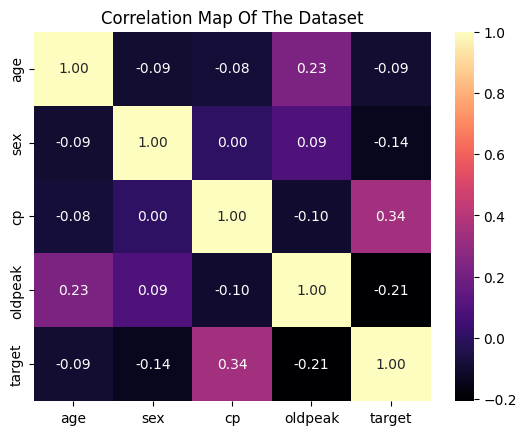

In [376]:
sns.heatmap(data=heart_df.corr(numeric_only=True),cmap='magma', annot=True , fmt='.2f')
plt.title('Correlation Map Of The Dataset')
plt.show()

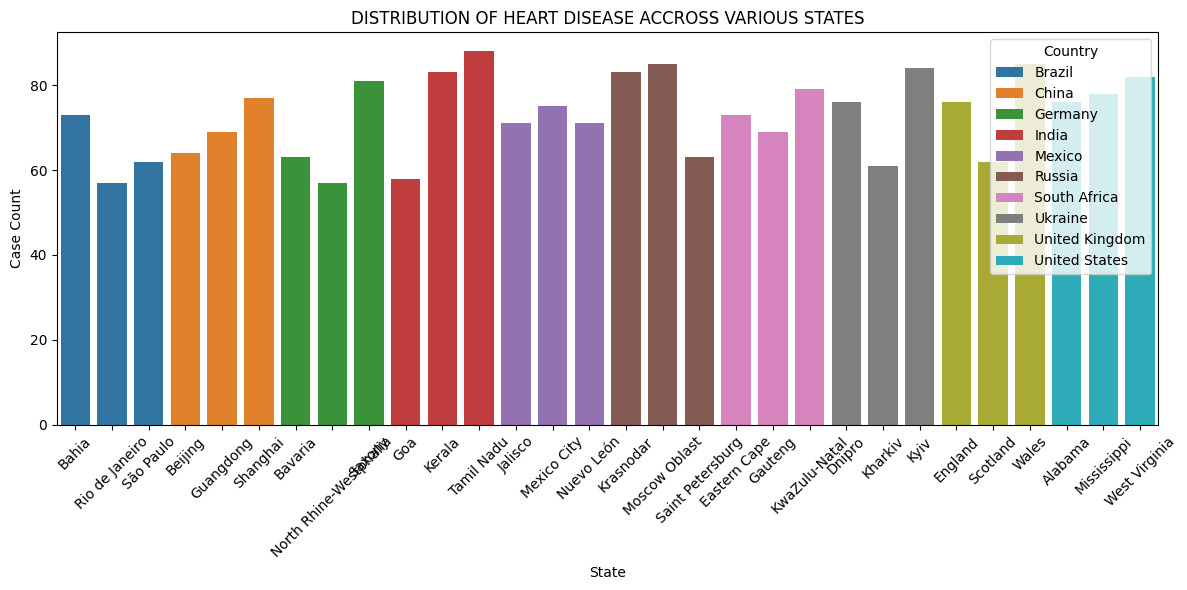

In [377]:
#Checking distribution among states 
state_count = heart_df.groupby(['Country','State'])['State'].count().reset_index(name='Case Count')




plt.figure(figsize=(12,6))
sns.barplot(data=state_count, x ='State' , y='Case Count', hue='Country')
plt.title("DISTRIBUTION OF HEART DISEASE ACCROSS VARIOUS STATES")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [378]:
state_count.head()

,Country,State,Case Count
0,Brazil,Bahia,73
1,Brazil,Rio de Janeiro,57
2,Brazil,São Paulo,62
3,China,Beijing,64
4,China,Guangdong,69


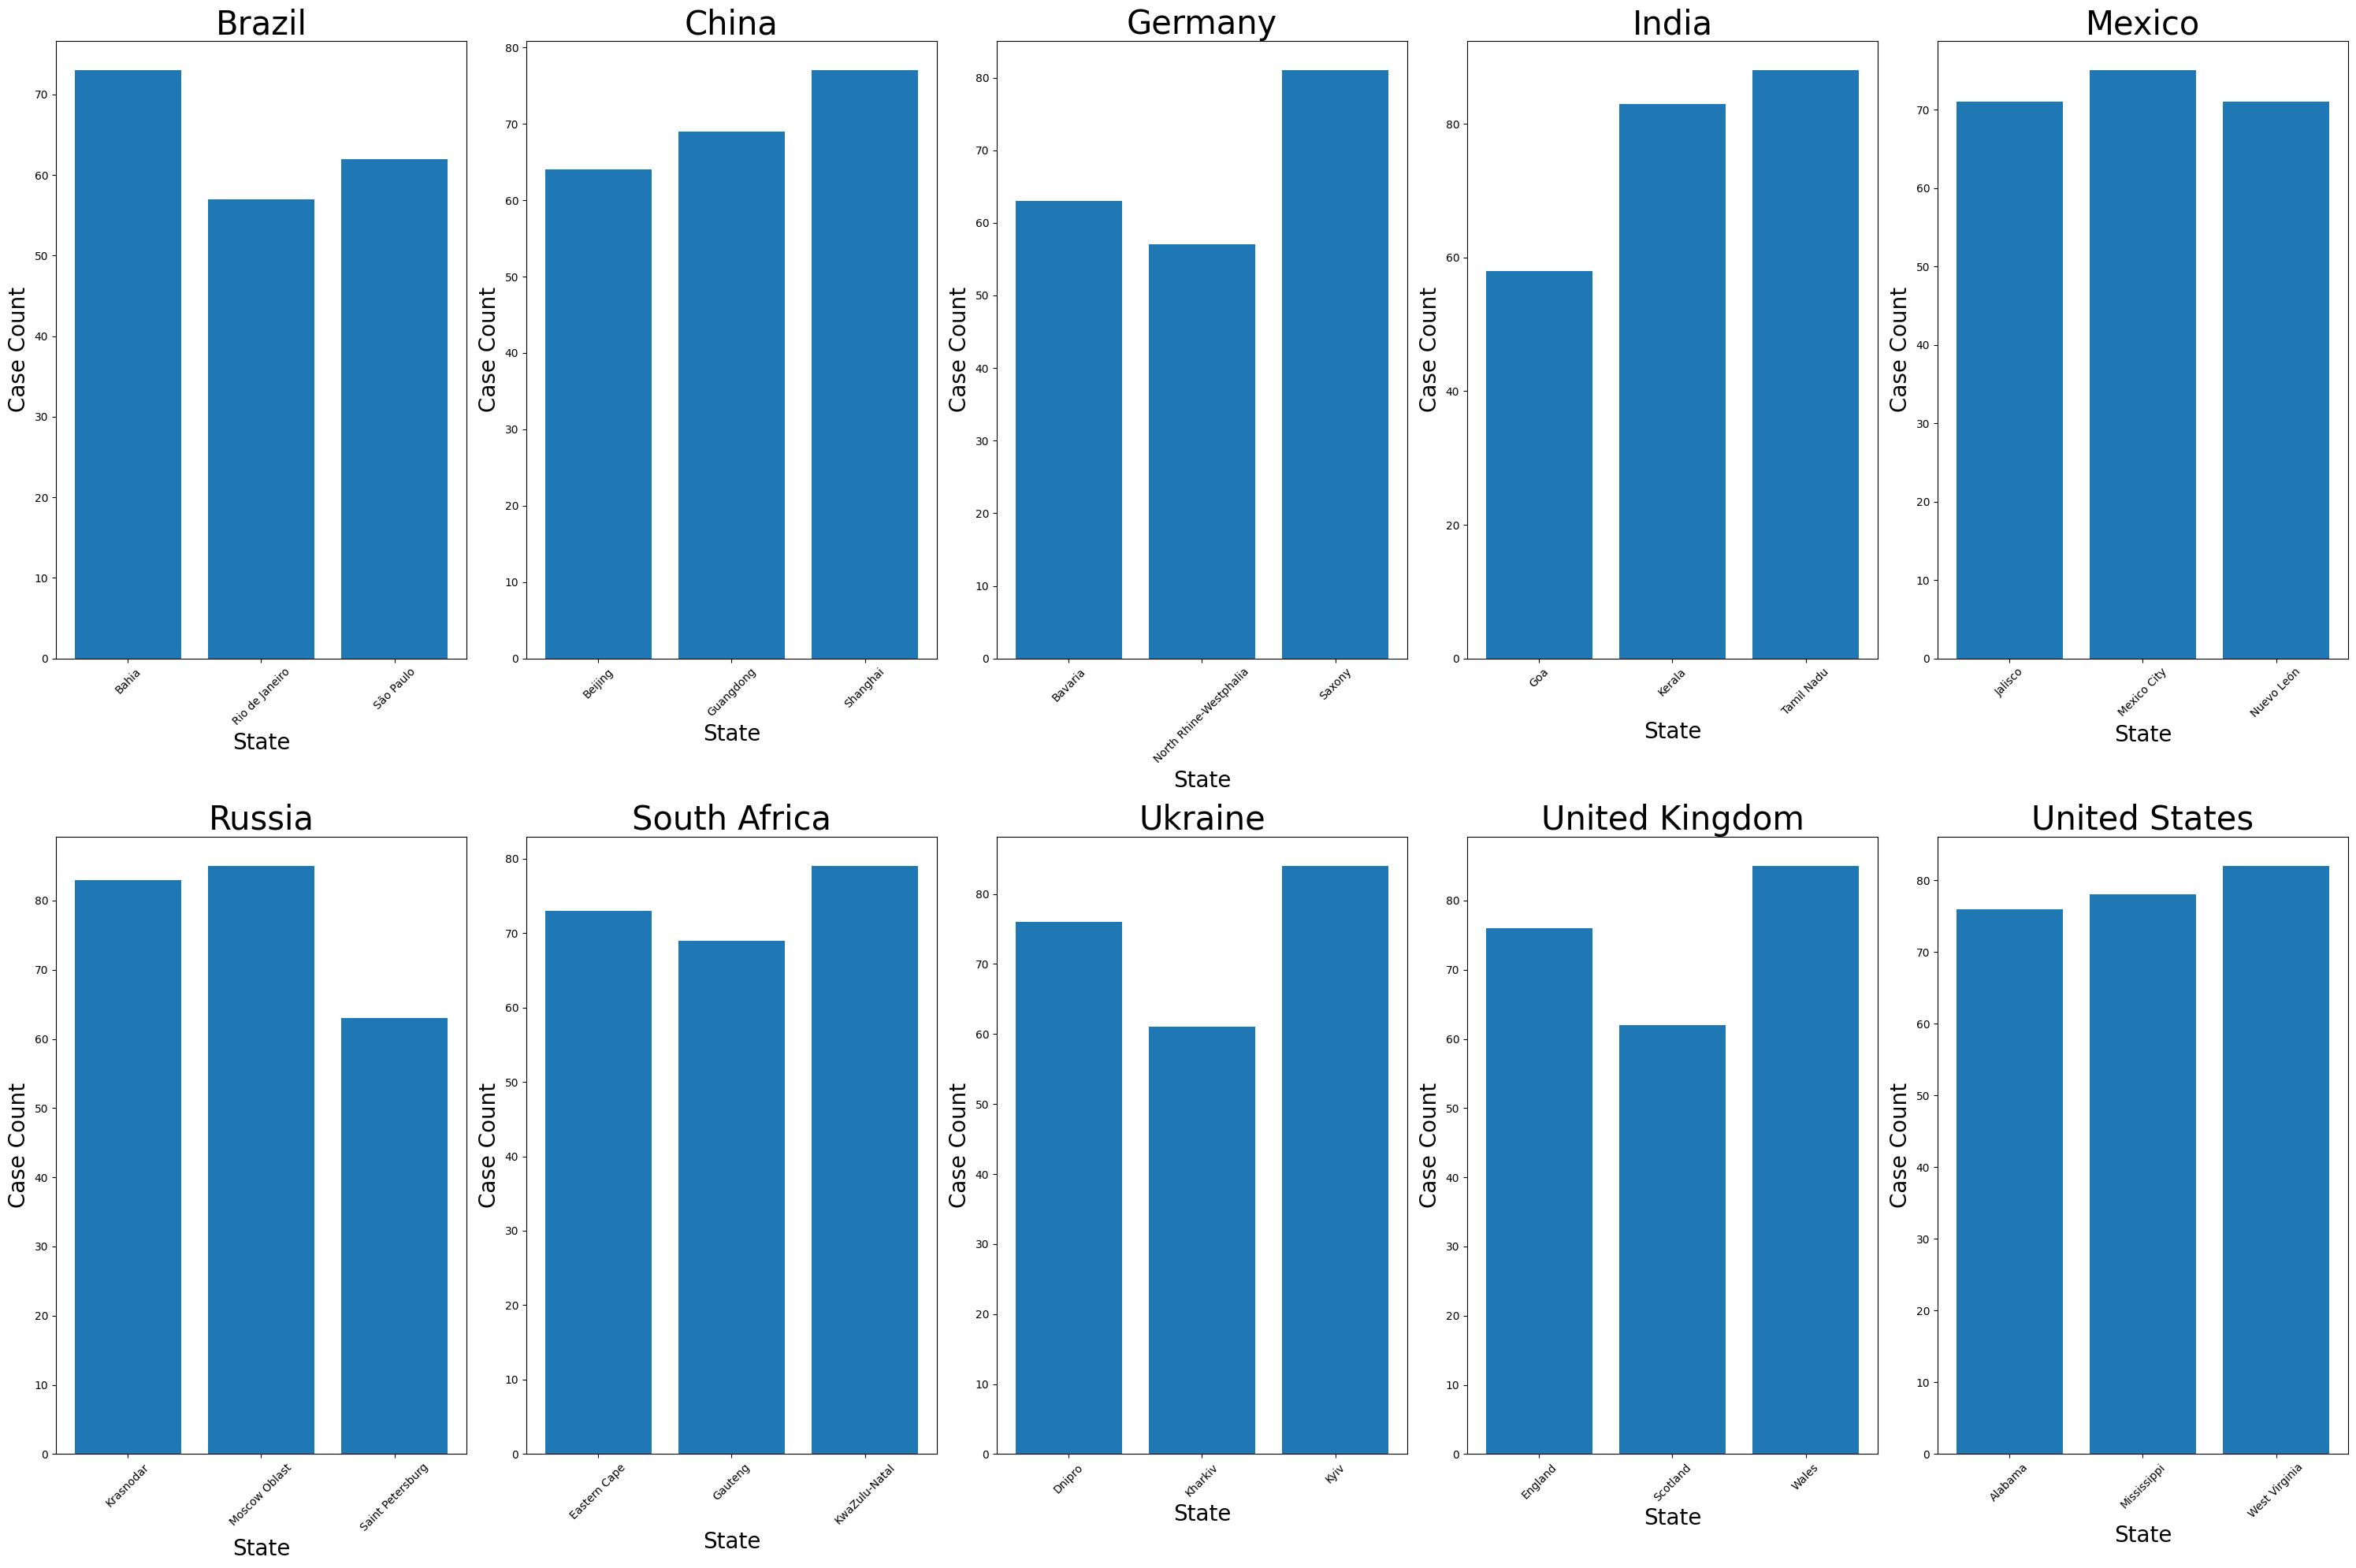

In [379]:
fig, axes = plt.subplots(2, 5, figsize=(30, 20))

countries = state_count['Country'].unique()

for ax, country in zip(axes.flat, countries):
    data = state_count.loc[state_count['Country'] == country][['State', 'Case Count']]
    ax.bar(data['State'], data['Case Count'])
    ax.set_title(country, fontsize=30)
    ax.set_xlabel('State', fontsize=20)
    ax.set_ylabel('Case Count', fontsize=20)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [380]:
def classify_gender(sex):
    if sex == 0:
        return "Male"
    else:
        return "Female"
    


heart_df.insert(4,'Gender', heart_df['sex'].apply(classify_gender))

In [381]:
heart_df.head()

,age,Country,State,sex,Gender,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,Russia,Krasnodar,1,Female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,United States,West Virginia,1,Female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,China,Shanghai,0,Male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Germany,Bavaria,1,Female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,India,Kerala,0,Male,0,120,354,0,1,163,1,0.6,2,0,2,1


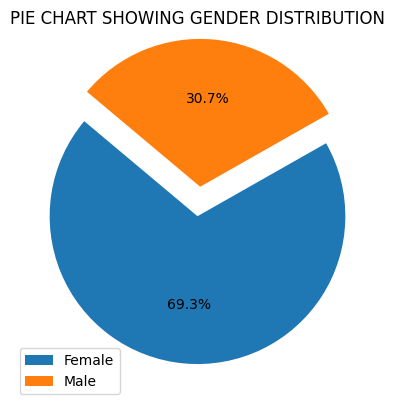

In [382]:
plt.pie(heart_df['sex'].value_counts(), autopct='%1.1f%%', startangle=140, explode=[0,0.2])
plt.legend(labels= heart_df['Gender'].unique())
plt.title("PIE CHART SHOWING GENDER DISTRIBUTION")
plt.show()

In [383]:
def Diagnosis_Target(target):
    if target == 0:
        return "Negative"
    else:
        return "Positive"
    


heart_df.insert(16,'Diagnosis', heart_df['target'].apply(Diagnosis_Target))

In [384]:

cols = ['trestbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exang', 'slope', 'ca', 'thal']

heart_df = heart_df[~heart_df[cols].isin(['?']).any(axis=1)]
heart_df[cols]=heart_df[cols].astype(int)

In [385]:
import pandas as pd

# Country coordinates (centroids)
country_coords = {
    'Brazil': {'lat': -14.2350, 'lon': -51.9253},
    'Mexico': {'lat': 23.6345, 'lon': -102.5528},
    'South Africa': {'lat': -30.5595, 'lon': 22.9375},
    'United States': {'lat': 37.0902, 'lon': -95.7129},
    'Russia': {'lat': 61.5240, 'lon': 105.3188},
    'China': {'lat': 35.8617, 'lon': 104.1954},
    'Ukraine': {'lat': 48.3794, 'lon': 31.1656},
    'Germany': {'lat': 51.1657, 'lon': 10.4515},
    'United Kingdom': {'lat': 55.3781, 'lon': -3.4360},
    'India': {'lat': 20.5937, 'lon': 78.9629},
}

# State coordinates (centroids)
state_coords = {
    'Bahia': {'lat': -12.978, 'lon': -41.671},
    'Nuevo León': {'lat': 25.592, 'lon': -99.996},
    'Eastern Cape': {'lat': -32.000, 'lon': 27.000},
    'Jalisco': {'lat': 20.58, 'lon': -103.61},
    'Rio de Janeiro': {'lat': -22.90, 'lon': -43.20},
    'West Virginia': {'lat': 39.00, 'lon': -80.50},
    'Saint Petersburg': {'lat': 59.95, 'lon': 30.33},
    'Shanghai': {'lat': 31.23, 'lon': 121.47},
    'KwaZulu‑Natal': {'lat': -30.57, 'lon': 30.57},
    'Kharkiv': {'lat': 49.98, 'lon': 36.25},
    'Guangdong': {'lat': 23.3790, 'lon': 113.7633},
    'Alabama': {'lat': 32.8067, 'lon': -86.7911},
    'Saxony': {'lat': 51.0504, 'lon': 13.7373},
    'Wales': {'lat': 52.1307, 'lon': -3.7837},
    'São Paulo': {'lat': -23.5505, 'lon': -46.6333},
    'Mexico City': {'lat': 19.4326, 'lon': -99.1332},
    'Mississippi': {'lat': 32.3547, 'lon': -89.3985},
    'North Rhine‑Westphalia': {'lat': 51.4332, 'lon': 7.6616},
    'Goa': {'lat': 15.2993, 'lon': 74.1240},
    'Dnipro': {'lat': 48.45, 'lon': 34.98},
    'Gauteng': {'lat': -26.2708, 'lon': 28.1123},
    'Kerala': {'lat': 10.8505, 'lon': 76.2711},
    'Tamil Nadu': {'lat': 11.1271, 'lon': 78.6569},
    'Beijing': {'lat': 39.9042, 'lon': 116.4074},
    'Scotland': {'lat': 56.4907, 'lon': -4.2026},
    'England': {'lat': 52.3555, 'lon': -1.1743},
    'Moscow Oblast': {'lat': 55.75, 'lon': 37.50},
    'Bavaria': {'lat': 48.7775, 'lon': 11.4311},
    'Kyiv': {'lat': 50.4500, 'lon': 30.5233},
    'Krasnodar': {'lat': 45.0355, 'lon': 38.9753},
}

# Ensure no leading/trailing spaces
heart_df['Country'] = heart_df['Country'].str.strip()
heart_df['State'] = heart_df['State'].str.strip()

# Map country and state coordinates
def map_coordinates(row):
    country = row['Country']
    state = row['State']
    
    # Default None
    country_lat, country_lon = None, None
    state_lat, state_lon = None, None
    
    # Map country
    if country in country_coords:
        country_lat = country_coords[country]['lat']
        country_lon = country_coords[country]['lon']
    
    # Map state
    if state in state_coords:
        state_lat = state_coords[state]['lat']
        state_lon = state_coords[state]['lon']
    
    return pd.Series({
        'C_lat': country_lat,
        'C_lon': country_lon,
        'S_lat': state_lat,
        'S_lon': state_lon
    })

# Apply to DataFrame
heart_df[['C_lat','C_lon','S_lat','S_lon']] = heart_df.apply(map_coordinates, axis=1)


In [415]:
heart_df.sample()

,age,Country,State,sex,Gender,cp,trestbps,chol,fbs,restecg,...,oldpeak,slope,ca,thal,Diagnosis,target,C_lat,C_lon,S_lat,S_lon
2072,55,China,Guangdong,1,Female,0,132,353,0,1,...,1.2,1,1,3,Negative,0,35.8617,104.1954,23.379,113.7633


In [387]:
heart_df.to_csv('heart_disease_dataset_with_countries_states.csv', index=False)

In [388]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1888 entries, 0 to 2180
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1888 non-null   int64  
 1   Country    1888 non-null   object 
 2   State      1888 non-null   object 
 3   sex        1888 non-null   int64  
 4   Gender     1888 non-null   object 
 5   cp         1888 non-null   int64  
 6   trestbps   1888 non-null   int64  
 7   chol       1888 non-null   int64  
 8   fbs        1888 non-null   int64  
 9   restecg    1888 non-null   int64  
 10  thalachh   1888 non-null   int64  
 11  exang      1888 non-null   int64  
 12  oldpeak    1888 non-null   float64
 13  slope      1888 non-null   int64  
 14  ca         1888 non-null   int64  
 15  thal       1888 non-null   int64  
 16  Diagnosis  1888 non-null   object 
 17  target     1888 non-null   int64  
 18  C_lat      1888 non-null   float64
 19  C_lon      1888 non-null   float64
 20  S_lat      17

In [389]:
heart_df.sample()

,age,Country,State,sex,Gender,cp,trestbps,chol,fbs,restecg,...,oldpeak,slope,ca,thal,Diagnosis,target,C_lat,C_lon,S_lat,S_lon
1314,45,South Africa,Gauteng,1,Female,1,128,308,0,0,...,0.0,2,0,2,Positive,1,-30.5595,22.9375,-26.2708,28.1123


In [390]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1888 entries, 0 to 2180
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1888 non-null   int64  
 1   Country    1888 non-null   object 
 2   State      1888 non-null   object 
 3   sex        1888 non-null   int64  
 4   Gender     1888 non-null   object 
 5   cp         1888 non-null   int64  
 6   trestbps   1888 non-null   int64  
 7   chol       1888 non-null   int64  
 8   fbs        1888 non-null   int64  
 9   restecg    1888 non-null   int64  
 10  thalachh   1888 non-null   int64  
 11  exang      1888 non-null   int64  
 12  oldpeak    1888 non-null   float64
 13  slope      1888 non-null   int64  
 14  ca         1888 non-null   int64  
 15  thal       1888 non-null   int64  
 16  Diagnosis  1888 non-null   object 
 17  target     1888 non-null   int64  
 18  C_lat      1888 non-null   float64
 19  C_lon      1888 non-null   float64
 20  S_lat      17

In [391]:
my_dict = {'Taiwo':{"lat":10,'lon':2}}

In [392]:
my_dict['Taiwo']['lat']

10

In [418]:
heart_df.sample(4)

,age,Country,State,sex,Gender,cp,trestbps,chol,fbs,restecg,...,oldpeak,slope,ca,thal,Diagnosis,target,C_lat,C_lon,S_lat,S_lon
431,52,India,Tamil Nadu,1,Female,2,138,223,0,1,...,0.0,2,4,2,Positive,1,20.5937,78.9629,11.1271,78.6569
1088,55,Germany,Bavaria,1,Female,0,160,289,0,0,...,0.8,1,1,3,Negative,0,51.1657,10.4515,48.7775,11.4311
538,64,Russia,Saint Petersburg,1,Female,3,170,227,0,0,...,0.6,1,0,3,Positive,1,61.5240,105.3188,59.9500,30.3300
738,57,Russia,Krasnodar,0,Male,0,120,354,0,1,...,0.6,2,0,2,Positive,1,61.5240,105.3188,45.0355,38.9753
